# Let's predict how many people ride bicycle at Monday 3pm with nice weather.

# Target
- Predict the rental amount

## Input Data

**Task summary**

1. Get data from ~/data/data/bike-sharing-demand/train.csv
2. Preprocess the data
 - datetime column to datetime type => make 6 columns
3. the 6 columns visualize using sns.countplot
4. split train and test

In [11]:
# Task 1: Get data
import pandas as pd # import pandas

# Get data from csv using read_csv
original = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")

# to check, show head.
original.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
# Task 2: cast to datetime and create 6 columns

# Convert the datetime
original['datetime'] = pd.to_datetime(original['datetime'])

# create 6 columns
original['year'] = original['datetime'].dt.year
original['month'] = original['datetime'].dt.month
original['day'] = original['datetime'].dt.day
original['hour'] = original['datetime'].dt.hour
original['minute'] = original['datetime'].dt.minute
original['second'] = original['datetime'].dt.second

# to check, show head.
original.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,0


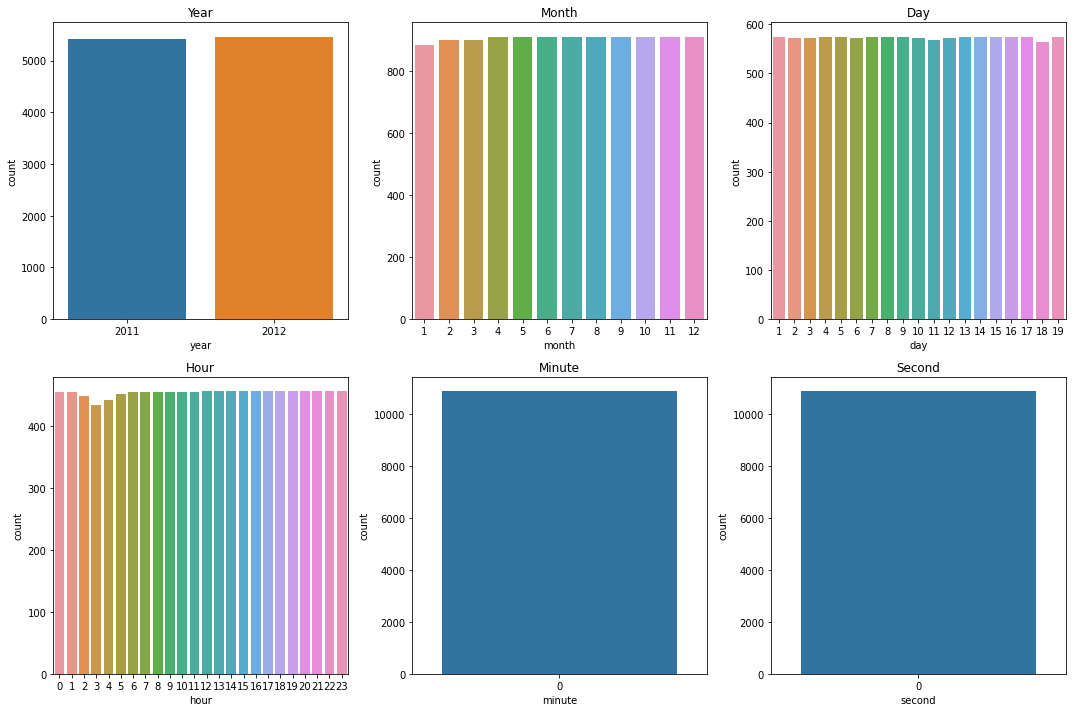

In [16]:
# Task 3: visualize 6 columns
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot countplot for each column
sns.countplot(x='year', data=original, ax=axes[0, 0])
sns.countplot(x='month', data=original, ax=axes[0, 1])
sns.countplot(x='day', data=original, ax=axes[0, 2])
sns.countplot(x='hour', data=original, ax=axes[1, 0])
sns.countplot(x='minute', data=original, ax=axes[1, 1])
sns.countplot(x='second', data=original, ax=axes[1, 2])

# Set titles for each subplot
axes[0, 0].set_title('Year')
axes[0, 1].set_title('Month')
axes[0, 2].set_title('Day')
axes[1, 0].set_title('Hour')
axes[1, 1].set_title('Minute')
axes[1, 2].set_title('Second')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [45]:
# Task 4: Split train and test
# To split datasets, I need to use the function called "train_test_split"
from sklearn.model_selection import train_test_split

# For X, I except datetime, casual, and registered.
X = original[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'minute', 'second']]
y = original['count']
print(len(y))
# I use train_test_split function for divide data
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=0.2, random_state=42)
)

10886


## Prepare and train model

**Task summary**

1. call LinearRegression
2. Print prediction about X_test and then, calculate loss function
3. Visualize two column

In [46]:
# Task 5: call LinearRegression
from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Task 6: Print prediction about X_test and then, calculate loss function
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)**0.5

print(f'MSE:: {mse}')
print(f'MSE:: {rmse}')

MSE:: 19945.370053754035
MSE:: 141.22807813517124


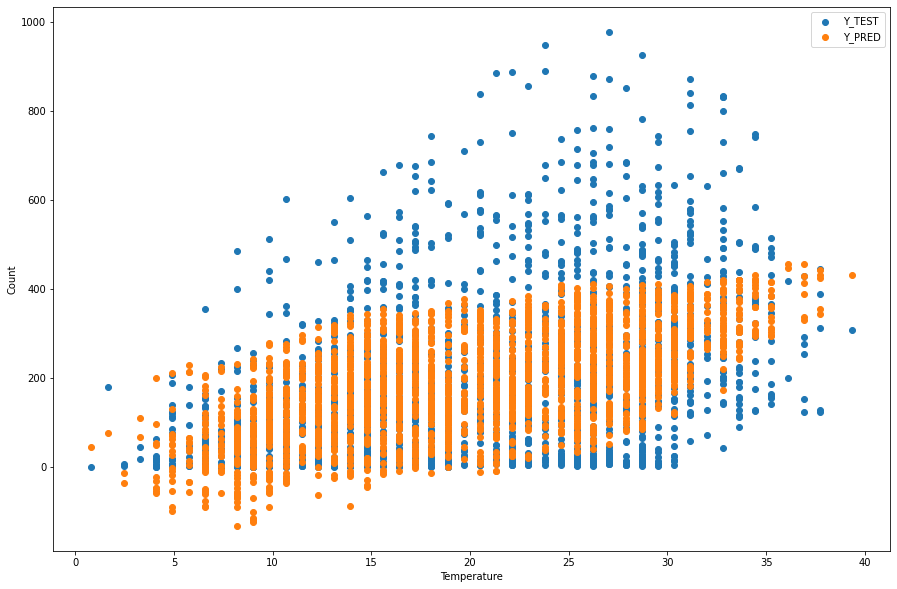

In [50]:
# Task 7-1: Visualize two diagram for temp 

# Create plot
plt.figure(figsize=(15, 10))

# Set scatter plots
plt.scatter(X_test['temp'], y_test, label='Y_TEST')
plt.scatter(X_test['temp'], predictions, label='Y_PRED')

# Add labels
plt.xlabel('Temperature')
plt.ylabel('Count')

# Set show legend
plt.legend()

# show plots
plt.show()


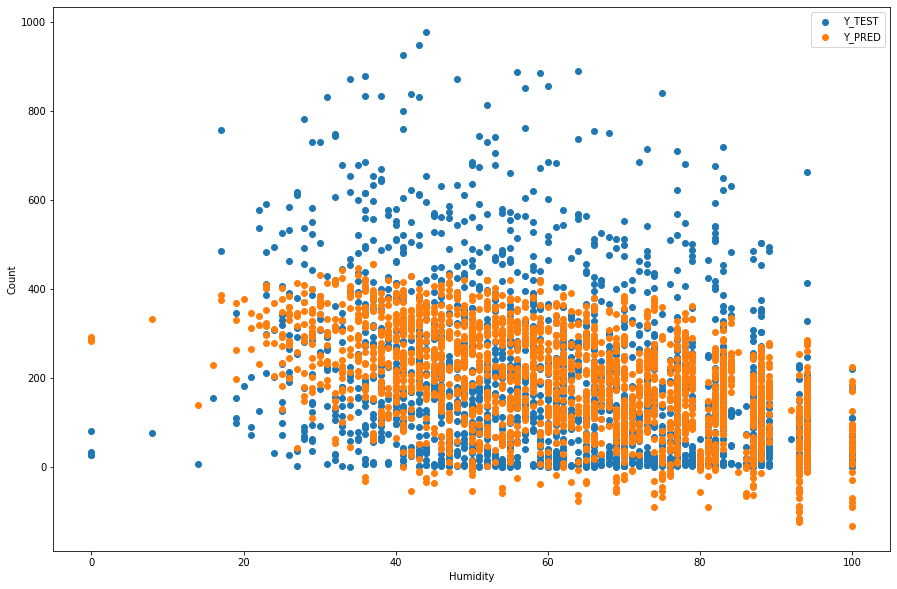

In [51]:
# Task 7-2: Visualize two diagram for humidity 

# Create plot
plt.figure(figsize=(15, 10))

# Set scatter plots
plt.scatter(X_test['humidity'], y_test, label='Y_TEST')
plt.scatter(X_test['humidity'], predictions, label='Y_PRED')

# Add labels
plt.xlabel('Humidity')
plt.ylabel('Count')

# Set show legend
plt.legend()

# show plots
plt.show()
